In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [21]:
#Load Dataset
dataset = pd.read_csv('dataset.csv')
#split DV and IDVs
X = dataset.iloc[:, 3:-1] # Features
y = dataset.iloc[:, -1] # Target variable

In [20]:
dataset.head()

,State,District,age,Gender,Primary education,Secondary education,Higher education,UR,Literacy,fn,active_dfs
0,Maharashtra,Pune,15,0,0,1,0,1,1,0,1
1,Maharashtra,Pune,55,1,0,1,0,1,1,0,1
2,Maharashtra,Pune,62,1,0,1,0,1,1,1,1
3,Maharashtra,Pune,26,1,0,1,0,1,1,1,1
4,Maharashtra,Pune,39,1,0,1,0,1,1,1,1


In [22]:
X.head()
y

0      1
1      1
2      1
3      1
4      1
      ..
170    1
171    1
172    0
173    0
174    1
Name: active_dfs, Length: 175, dtype: int64

In [26]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [27]:
X_train.head()

,Gender,Primary education,Secondary education,Higher education,UR,Literacy,fn
44,1,1,0,0,1,1,1
80,0,0,1,0,1,1,0
108,1,0,0,1,1,1,1
98,0,0,1,0,1,1,1
171,1,0,1,0,1,1,0


In [28]:
X_test.head()

,Gender,Primary education,Secondary education,Higher education,UR,Literacy,fn
54,0,0,1,0,1,1,1
153,1,0,1,0,0,0,1
63,0,0,0,0,1,1,1
55,0,1,0,0,1,1,1
122,0,0,1,0,0,0,1


In [29]:
y_train.head()

44     0
80     1
108    1
98     0
171    1
Name: active_dfs, dtype: int64

In [30]:
y_test.head()

54     1
153    1
63     1
55     1
122    0
Name: active_dfs, dtype: int64

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [32]:
#X1=sm.add_constant(np.concatenate((X, stud), axis=1))
print(sm.Logit(y_train, X_train).fit(method='ncg').summary())

Optimization terminated successfully.
         Current function value: 0.463373
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 16
         Hessian evaluations: 8
                           Logit Regression Results                           
Dep. Variable:             active_dfs   No. Observations:                  140
Model:                          Logit   Df Residuals:                      133
Method:                           MLE   Df Model:                            6
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                  0.2167
Time:                        22:42:44   Log-Likelihood:                -64.872
converged:                       True   LL-Null:                       -82.824
Covariance Type:            nonrobust   LLR p-value:                 2.879e-06
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [33]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 4,  6],
       [ 1, 24]])

Text(0.5, 257.44, 'Predicted label')

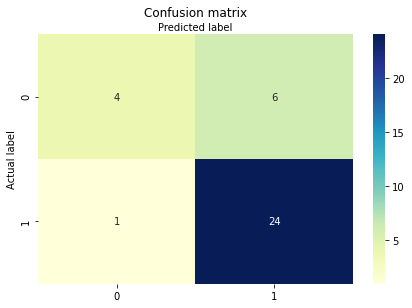

In [34]:
#Plot Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.8
Recall: 0.96


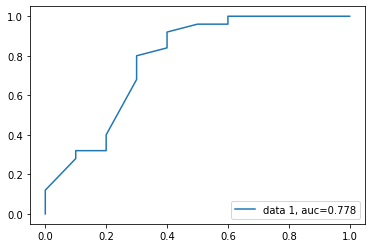

In [36]:
#ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()